In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('F:\glass.csv')



In [49]:
df.head()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   AI      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [51]:

df.describe()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [52]:
df.isna().sum()

Id      0
RI      0
Na      0
Mg      0
AI      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [53]:
df.shape

(214, 11)

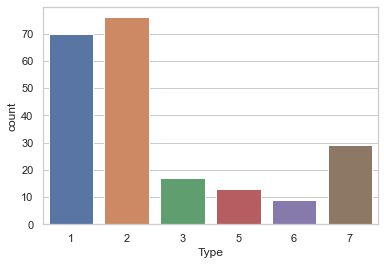

In [55]:
sns.countplot(x = df['Type'])
plt.show()

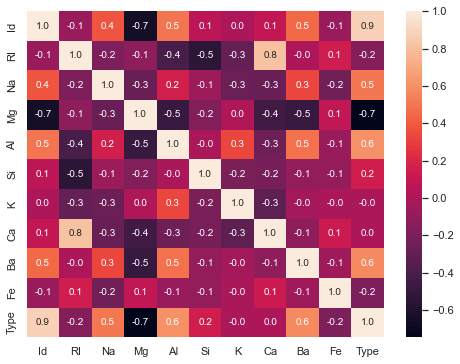

In [56]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')
plt.show()


In [57]:
X = df.drop(columns = ['Type'])
y = df['Type']

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()


In [60]:
xcolumns = X.columns


In [61]:
X = scaler.fit_transform(X)


In [62]:

X = pd.DataFrame(X, columns = xcolumns)

In [63]:
X.head()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [64]:
from sklearn.model_selection import train_test_split

In [65]:

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.25, random_state = 100)


In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
model = GaussianNB()

In [69]:
model.fit(X_train, y_train)

GaussianNB()

In [70]:
model.score(X_train, y_train)

0.88125

In [71]:
y_pred = model.predict(X_test)

In [72]:
from sklearn import metrics

In [73]:
metrics.accuracy_score(y_test, y_pred)


0.7777777777777778

In [74]:

metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0,  0,  0,  0],
       [ 7, 15,  1,  0,  0,  0],
       [ 0,  1,  2,  0,  0,  0],
       [ 0,  2,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

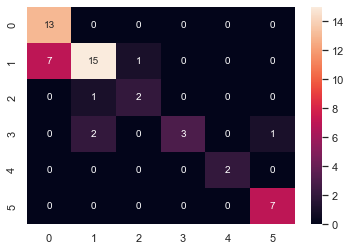

In [75]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True)
plt.show()

In [76]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.65      1.00      0.79        13
           2       0.83      0.65      0.73        23
           3       0.67      0.67      0.67         3
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.78        54
   macro avg       0.84      0.80      0.80        54
weighted avg       0.81      0.78      0.77        54

